## SVD
- SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있음\
=> 직교 = 수직 (orthogonal, perpendicular) \
=> 각 벡터의 길이의 제곱의 합이 빗변 (2개의 벡터의 합)의 길이 제곱과 같아짐 \
=> 2개 벡터가 직교인지 알고 싶다면 내적을 (dot product) 구해서 0인지 확인하면 됨 (xTy=0)

- 임의의 m x n 차원의 행렬 A에 대하여 아래와 같이 행렬을 분해할 수 있다는 '행렬 분해 (decomposition)' 방법 중 하나.
$$A = U \sum V^T$$

 여기서 네 행렬 (A, U, Σ, V)의 크기 (차원)과 성질은 다음과 같음:
- SVD는 특이값 분해로 불리며 행렬 U와 V에 속한 벡터는 특이벡터(singular vector)이며 모든 특이벡터는 서로 직교하는 성질을 갖는다.
    > U : m x m orthogonal matrix\
    > V : n x n orthogonal matrix
- 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0이다.
- $\sum$이 위치한 0이 아닌 값이 바로 행렬 A의 특이값이다.
- A의 차원이 m x n일 때 U의 차원이 m x m, $\sum$의 차원이 m x n, $V^T$의 차원이 n X n으로 분해한다.

$$A = U \sum V^T$$

### SVD 개요

In [ ]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4x4 random 행렬 a 생성
np.random.seed(121)
a=np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


 SVD(Singular Value Decomposition)를 사용하여 행렬을 분해
 - SVD는 임의의 행렬 A를 세 개의 행렬 $U,Σ,V^T$
 로 분해합니다. 이를 통해 행렬의 구조를 분석하거나 차원을 축소할 수 있습니다.

In [ ]:
# SVD 분해 : U 행렬, Sigma 행렬, V 전치 행렬을 반환
# sigma 행렬은 0이 아닌 경우만 1차원 행렬로 표현

U, Sigma, Vt= svd(a)
print(U.shape, Sigma.shape, Vt.shape,'\n')
print('U matrix: \n', np.round(U,3),'\n')
print('Sigma Value: \n', np.round(Sigma, 3),'\n')
print('V transpose matrix: \n', np.round(Vt, 3))

(4, 4) (4,) (4, 4) 

U matrix: 
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]] 

Sigma Value: 
 [3.423 2.023 0.463 0.079] 

V transpose matrix: 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


원본 행렬 복원
- 대각행렬 변환: np.diag 함수를 사용하여 Σ를 대각 행렬로 변환합니다. 이는 SVD의 복원 과정에서 필요합니다.
- 원본 행렬 복원: U, Σ(대각 행렬로 변환된), $V^T$를 곱하여 원본 행렬을 복원합니다.

In [ ]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat=np.diag(Sigma)
a_=np.dot(np.dot(U, Sigma_mat), Vt) # np.dot = 두 행렬의 곱.
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [ ]:
a[2]=a[0]+a[1]
a[3]=a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


Truncated SVD
- Truncated SVD는 전체 SVD에서 상위 몇 개의 특이값 및 그에 대응하는 특이벡터들만을 사용하여 근사적인 행렬을 복원하는 방법입니다. Truncated SVD는 차원 축소와 데이터 압축에 유용합니다.
- 주로 데이터의 차원을 축소하여 계산 효율성을 높이고 노이즈를 제거하기 위해 사용됩니다.
- 상위 특이값만을 사용하면 데이터의 주요 구조를 유지하면서 차원을 줄일 수 있습니다.

In [ ]:
# 다시 SVD를 수행하여 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value: \n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value: 
 [2.663 0.807 0.    0.   ]


In [ ]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


Truncated SVD를 이용한 행렬 분해

svd vs. svds
* svd는 입력 행렬을 완전하게 분해하여 모든 특이값과 특이벡터를 반환. 중소 규모의 행렬에 적합.
* svds 함수는 희소 행렬 도는 매우 큰 행렬에 대해 SVD를 수행할 때 사용
* svds는 주어진 개수의 가장 큰 특이값과 그에 대응하는 특이벡터만을 계산해서 계산 비용을 절약하고 효율성을 높임

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix=np.random.random((6,6))
print('원본 행렬: \n', matrix)
U, Sigma, Vt=svd(matrix, full_matrices=False)
print('\n분해 행렬 차원: ', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬: ', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components=4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTurncated SVD 분해 행렬 차원: ', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma 값 행렬: ', Sigma_tr)
matrix_tr=np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬: \n', matrix_tr)

원본 행렬: 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원:  (6, 6) (6,) (6, 6)

Sigma값 행렬:  [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Turncated SVD 분해 행렬 차원:  (6, 4) (4,) (4, 6)

Truncated SVD Sigma 값 행렬:  [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬: 
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72

복원된 행렬의 상태
- Truncated SVD는 일부 특이값만 사용하기 때문에 원본 행렬을 완벽하게 복원하지 못할 수 있습니다. 복원된 행렬은 근사치가 됩니다.
- Truncated SVD를 사용하여 복원된 행렬과 원본 행렬 간의 차이를 비교할 수 있습니다.

Task1_0731. iris 데이터셋에 대하여 n_components=2를 적용하고 TruncatedSVD를 사용하여 추출된 2개의 component로 품종을 구분하는 것을 시각화하세요.

- from sklearn.decomposition import TruncatedSVD

In [ ]:
# 데이터 불러오기
from sklearn.datasets import load_iris
import pandas as pd

iris=load_iris()

x=iris.data
y=iris.target

# 데이터프레임화 시키기
iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Target']=y # 타겟 열 추가
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# 모델에 쓸 데이터 준비
x=iris_df.drop('Target', axis=1)
y=iris_df['Target']

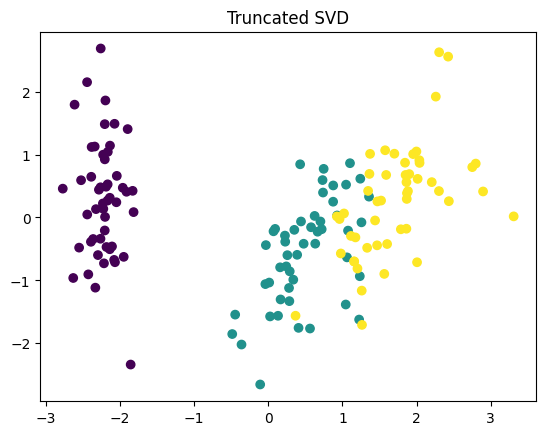

In [ ]:
from sklearn.decomposition import TruncatedSVD

# 특성 스케일링
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

# TruncatedSVD 적용
svd=TruncatedSVD(n_components=2)
iris_svd=svd.fit_transform(x_scaled)

# 시각화
plt.scatter(x=iris_svd[:, 0], y=iris_svd[:, 1], c=iris.target)
plt.title('Truncated SVD')
plt.show()

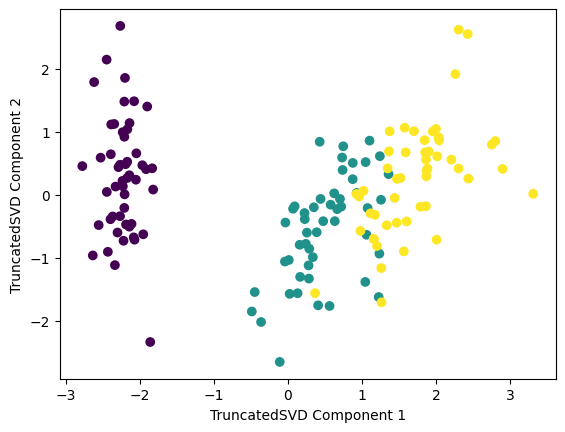

In [ ]:
# 강사님 풀이
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


iris = load_iris()
iris_ftrs = iris.data

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()
plt.close()

Task2_0731. Task1_0731 사례를 PCA로 적용한 시각화 결과와 비교하세요.

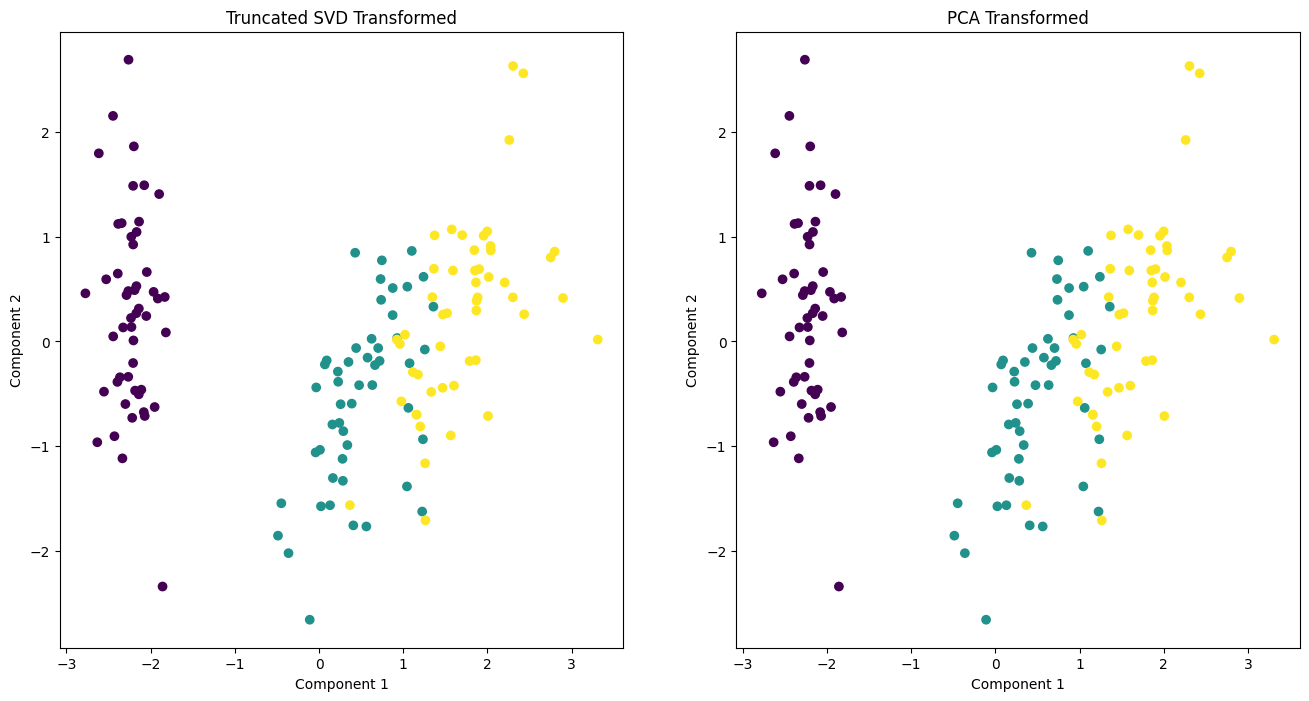

In [ ]:
# PCA 적용했을 때 :
# n_components=2를 적용하고
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 특성 스케일링
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

# PCA
pca=PCA(n_components=2)
iris_pca=pca.fit_transform(x_scaled)

import matplotlib.pyplot as plt
import seaborn as sns

# SVD와 PCA 그래프 동시 출력:

fig, axs=plt.subplots(figsize=(16,8), ncols=2, nrows=1)
axs[0].scatter(x=iris_svd[:, 0], y=iris_svd[:, 1], c=iris.target)
axs[0].set_title('Truncated SVD Transformed')
axs[0].set_xlabel('Component 1')
axs[0].set_ylabel('Component 2')


axs[1].scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
axs[1].set_title('PCA Transformed')
axs[1].set_xlabel('Component 1')
axs[1].set_ylabel('Component 2')

plt.show()

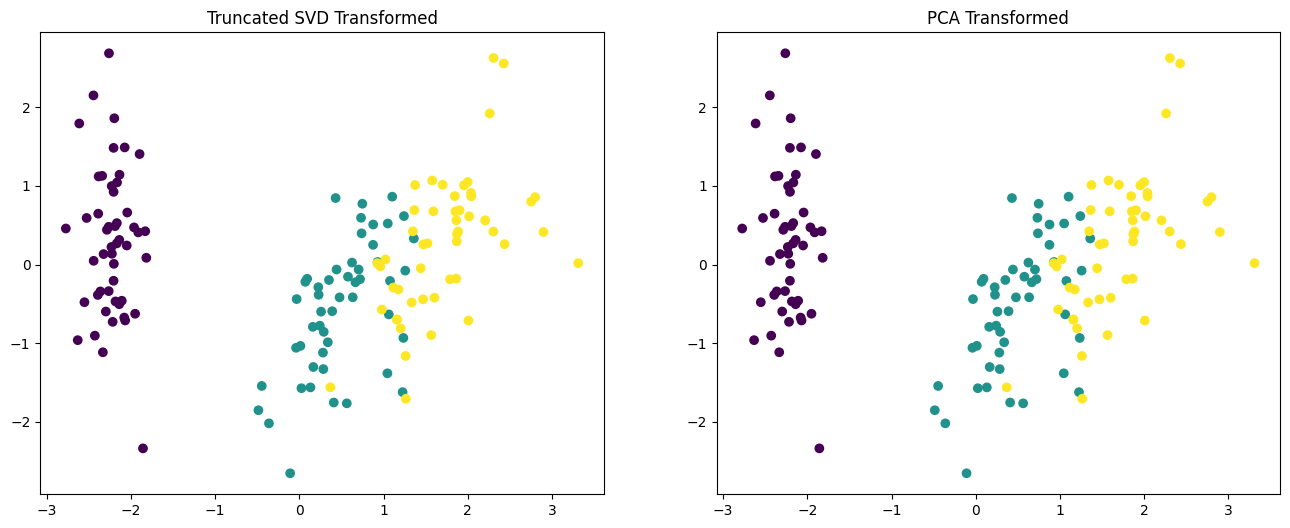

In [ ]:
# 강사님 풀이
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(16,6), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')
plt.show()
plt.close()

TruncatedSVD와 PCA는 밀집 행렬에 대해서는 매우 유사한 결과를 생성합니다. 특히 데이터가 스케일링되고 중심에 맞춰졌을 때 결과가 유사할 수 있습니다.
다만, 희소 행렬에 대해서는 TruncatedSVD가 더 잘 작동하며, PCA와는 결과가 다를 수 있습니다.

TruncatedSVD와 PCA의 차이

PCA (Principal Component Analysis):
- PCA는 입력 데이터의 공분산 행렬을 사용하여 주성분을 찾습니다.
- 데이터가 중심에 맞춰져 있어야 하므로, 일반적으로 스케일링 후 평균을 0으로 맞추는 것이 필요합니다.
- PCA는 밀집 행렬에 잘 맞습니다.

TruncatedSVD (Truncated Singular Value Decomposition):
- TruncatedSVD는 희소 행렬 또는 밀집 행렬에 대해 SVD를 수행하여 일부 성분만 계산합니다.
- 데이터의 중심 맞춤이 필요하지 않지만, 필요시 StandardScaler와 함께 사용할 수 있습니다.
- PCA와 다르게, 희소 행렬에서도 효과적으로 작동합니다.

#### NMF
- NMF(Non-negative Matrix Factorization, 비음수 행렬 분해)은 행렬을 두 개의 작은 행렬의 곱으로 분해하는 기법으로, 분해된 행렬의 모든 요소가 비음수(0 또는 양수)인 특징이 있습니다. 주로 데이터 마이닝, 이미지 처리, 텍스트 마이닝, 추천 시스템 등에서 사용됩니다.
- 주어진 행렬 V를 두 개의 비음수 행렬 W와 H로 분해하는 것을 목표로 합니다. 특정한 최적화 방법을 지정하지 않으며, 일반적으로는 곱셈 업데이트 규칙을 사용합니다. 그러나 SGD를 사용하여 NMF를 최적화할 수도 있습니다.
- Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형
- NMF는 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭

Text(0, 0.5, 'NMF component 2')

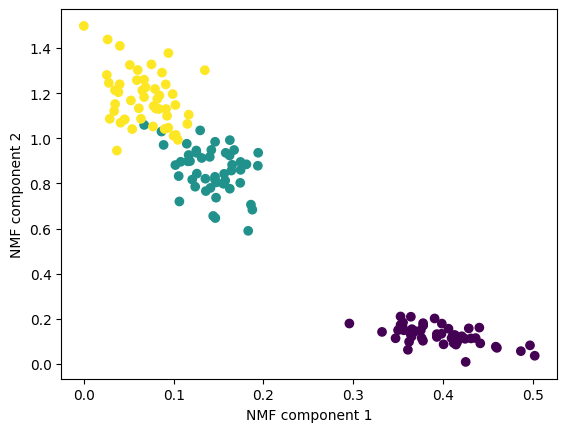

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris=load_iris()
iris_ftrs=iris.data

nmf=NMF(n_components=2, max_iter=500)
nmf.fit(iris_ftrs)
iris_nmf=nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF component 1')
plt.ylabel('NMF component 2')

Task3_0731. 와인 품질 데이터셋을 사용하여 Truncated SVD를 통해 차원 축소를 수행하고, 로지스틱 회귀 모델을 학습 및 평가를 수행하세요.(다음 사항 참조)

- 특성 및 레이블 분리: 데이터셋에서 와인의 화학적 특성(X)과 품질 레이블(y)을 분리합니다.
- 레이블 변환: 와인 품질을 범주형 변수로 변환합니다. 구체적으로, 품질 점수가 3-5인 경우 'low', 6인 경우 'medium', 7-8인 경우 'high'로 변환합니다.
- 데이터 정규화: StandardScaler를 사용하여 데이터의 특성을 정규화합니다.
- 차원 축소: TruncatedSVD를 사용하여 데이터의 차원을 5로 축소합니다.
- 데이터 분할: 데이터를 학습용과 테스트용으로 분할합니다.
- 모델 학습: 로지스틱 회귀 모델을 학습합니다.
- 모델 예측 및 평가: 테스트 데이터에 대한 예측을 수행하고, 정확도와 분류 보고서를 출력

In [ ]:
import pandas as pd

# 1. 데이터 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 특성 및 레이블 분리: 데이터셋에서 와인의 화학적 특성(X)과 품질 레이블(y)을 분리합니다.
x=data.drop(['quality'], axis=1)
y=data['quality']

In [ ]:
data['quality'].describe()

,quality
count,1599.000000
mean,5.636023
std,0.807569
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,8.000000


In [ ]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
# 레이블 변환: 와인 품질을 범주형 변수로 변환합니다.
# 구체적으로, 품질 점수가 3-5인 경우 'low', 6인 경우 'medium', 7-8인 경우 'high'로 변환합니다.
bins=[2,5,6,8]
labels=['low','medium','high']
data['quality_label']=pd.cut(data['quality'], bins=bins, labels=labels)

data['quality_label'].isnull().sum() # null 값 확인
# data.loc[(data['quality_label'].isnull())] # null 행 확인

0

In [ ]:
data.loc[(data['quality']<6)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5,low
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5,low
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5,low
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low


In [ ]:
data.groupby('quality_label').count()

<ipython-input-74-bdfa91be65b7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('quality_label').count()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality_label,,,,,,,,,,,,
low,744,744,744,744,744,744,744,744,744,744,744,744
medium,638,638,638,638,638,638,638,638,638,638,638,638
high,217,217,217,217,217,217,217,217,217,217,217,217


In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [ ]:
# 데이터 정규화: StandardScaler를 사용하여 데이터의 특성을 정규화합니다.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [ ]:
# 차원 축소: TruncatedSVD를 사용하여 데이터의 차원을 5로 축소합니다.
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=5)
data_svd=svd.fit_transform(x_scaled)

In [ ]:
# <<<< y를 수치형으로 진행했을 때 >>>>

# 데이터 분할: 데이터를 학습용과 테스트용으로 분할합니다.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=11)

# 모델 학습: 로지스틱 회귀 모델을 학습합니다.
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=11)
model.fit(x_train, y_train)

# 모델 예측 및 평가: 테스트 데이터에 대한 예측을 수행하고, 정확도와 분류 보고서를 출력
from sklearn.metrics import accuracy_score, classification_report

y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
report=classification_report(y_test, y_pred)

print("테스트 정확도: ", accuracy)
print("Classification Report: ", report)

테스트 정확도:  0.575
Classification Report:                precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         9
           5       0.67      0.69      0.68       138
           6       0.49      0.64      0.55       119
           7       0.62      0.28      0.38        47
           8       0.00      0.00      0.00         4

    accuracy                           0.57       320
   macro avg       0.30      0.27      0.27       320
weighted avg       0.56      0.57      0.55       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# <<<< y를 범주형으로 진행했을 때 >>>>

# 데이터 분할: 데이터를 학습용과 테스트용으로 분할합니다.
y2=data['quality_label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y2, test_size=0.2, random_state=11)

# 모델 학습: 로지스틱 회귀 모델을 학습합니다.
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=11)
model.fit(x_train, y_train)

# 모델 예측 및 평가: 테스트 데이터에 대한 예측을 수행하고, 정확도와 분류 보고서를 출력
from sklearn.metrics import accuracy_score, classification_report

y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
report=classification_report(y_test, y_pred)

print("테스트 정확도: ", accuracy)
print("Classification Report: ", report)

테스트 정확도:  0.61875
Classification Report:                precision    recall  f1-score   support

        high       0.78      0.35      0.49        51
         low       0.72      0.72      0.72       150
      medium       0.49      0.61      0.54       119

    accuracy                           0.62       320
   macro avg       0.66      0.56      0.58       320
weighted avg       0.64      0.62      0.62       320



In [ ]:
# 강사님 풀이
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize

# 1. 데이터 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# 특성과 레이블 분리
X = data.drop(columns='quality')
y = data['quality']

# 품질을 범주형 변수로 변환 (예: 3-5 -> low, 6 -> medium, 7-8 -> high)
y = y.apply(lambda x: 'low' if x <= 5 else ('medium' if x == 6 else 'high'))

# 2. 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. TruncatedSVD를 사용하여 차원 축소
n_components = 5  # 축소할 차원의 수
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X_scaled)

# 4. 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)

# 5. 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 평가 사용자 함수 정의
def evaluate_model(model, X_test, y_test):
    # 예측 수행
    y_pred = model.predict(X_test)

    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)

    # 분류 보고서 생성
    report = classification_report(y_test, y_pred)

    # ROC AUC 계산
    y_test_binarized = label_binarize(y_test, classes=['low', 'medium', 'high'])
    # 클래스가 2개 초과하여 binarize를 사용해서 이진화 시켜야함 (e.g. low vs others. medium vs others...)
    y_pred_prob = model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')

    # 결과 출력
    print(f"Test Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    print(f"Test ROC AUC: {roc_auc:.4f}")

# 6. 모델 평가
evaluate_model(model, X_test, y_test)


Test Accuracy: 0.5719

Classification Report:
              precision    recall  f1-score   support

        high       0.44      0.26      0.32        47
         low       0.64      0.80      0.71       141
      medium       0.50      0.44      0.47       132

    accuracy                           0.57       320
   macro avg       0.53      0.50      0.50       320
weighted avg       0.55      0.57      0.55       320

Test ROC AUC: 0.4285
